<a href="https://colab.research.google.com/github/ria3999/mahine_learning-codes/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(891, 12)

HYPOTHESIS GENERATION

1. More females would have survived.
2. More no of  higher Pclass people will survive.



In [ ]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Further Analysis

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

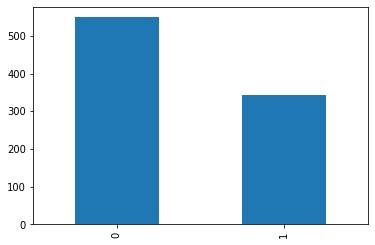

In [ ]:
df['Survived'].value_counts().plot.bar()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#bins=[0,18,35,50,80]
#group=['children','young_Adults','Adults','Senior citizens']
#df['Age']=pd.cut(df['Age'],bins,labels=group)

In [ ]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [ ]:
def fill_age(df):
  bins=[0,18,35,50,80]
  group=['children','young_Adults','Adults','Senior citizens']
  df['Age']=pd.cut(df['Age'],bins,labels=group)
  mode=df['Age'].mode()[0]
  df['Age'].fillna(mode,inplace=True)
  return df

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
def fill_Embarked(df):
    df.Embarked.fillna('S',inplace=True)
    return(df)


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

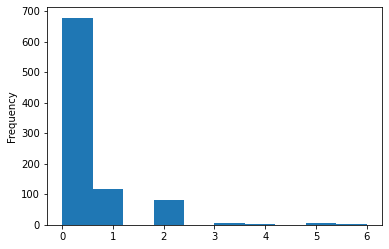

In [ ]:

df['Parch'].plot.hist()

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

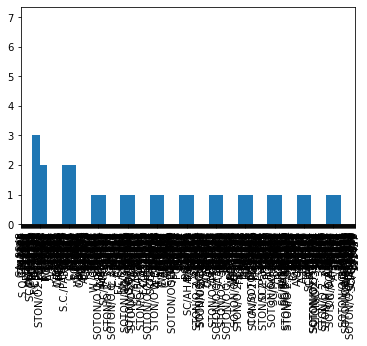

In [ ]:
df['Ticket'].value_counts().plot.bar()

In [ ]:
df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
F2             3
              ..
E68            1
E34            1
E36            1
D50            1
C45            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
CA 2144     6
           ..
PC 17600    1
239856      1
382649      1
370370      1
111427      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train,test=train_test_split(df,test_size=0.2,random_state=12)

In [ ]:
train.shape,test.shape

((712, 12), (179, 12))

In [ ]:
def train_test(df):
    length=len(df)
    train=df.iloc[:712,:]
    test=df.iloc[712:,]
    return train,test

In [ ]:
def label_encoder(df):
    from sklearn.preprocessing import LabelEncoder
    label=LabelEncoder()
    df['Sex']=label.fit_transform(df['Sex'])
    df['Embarked']=label.fit_transform(df['Embarked'])
    df['Age']=label.fit_transform(df['Age'])
    return df



In [ ]:
def encode_feature(df):
    df=fill_age(df)
    df=fill_Embarked(df)
    df=label_encoder(df)
    return df


In [ ]:
testing=pd.read_csv('/content/titanic_test.csv')

In [ ]:
len(testing)

418

In [ ]:
testing=encode_feature(testing)

In [ ]:
train=encode_feature(train)
test=encode_feature(test)


In [ ]:
len(testing)

418

In [ ]:
def x_and_y (df):
    x=df.drop(['Survived','PassengerId','Cabin','Name','Ticket'],axis=1)
    y=df['Survived']
    return x,y

In [ ]:
x_train,y_train=x_and_y(train)
x_test,y_test=x_and_y(test)

In [ ]:
len(testing)

418

In [ ]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
testing=testing.drop(['Cabin','Name','Ticket'],axis=1)

In [ ]:
len(testing)

418

In [ ]:
testing.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [ ]:
 testing['Fare'].fillna(testing['Fare'].mean(),inplace=True)

In [ ]:
testing.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
len(testing)

418

In [ ]:
PID=testing['PassengerId']

In [ ]:
testing=testing.drop(['PassengerId'],axis=1)

In [ ]:
type(PID)

pandas.core.series.Series

In [ ]:
testing.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3,0,0,7.8292,1
1,3,0,0,1,0,7.0000,2
2,2,1,1,0,0,9.6875,1
3,3,1,3,0,0,8.6625,2
4,3,0,3,1,1,12.2875,2


In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
8,3,0,3,0,2,11.1333,2
150,2,1,1,0,0,12.5250,2
221,2,1,3,0,0,13.0000,2
365,3,1,3,0,0,7.2500,2
324,3,1,3,8,2,69.5500,2


In [ ]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
y_train.isnull().sum()

0

In [ ]:
log_model= LogisticRegression()
log_model.fit(x_train,y_train)
prediction=log_model.predict(x_test)
score=accuracy_score(y_test,prediction)
print(score*100)

78.77094972067039


In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(log_model,x_train,y_train,cv=5)
print(cv.mean())

0.8006205062543092


In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
from sklearn.metrics  import confusion_matrix
x_test_prediction=log_model.predict(x_train)
confusion_matrix(y_train,x_test_prediction)
from sklearn.metrics import precision_score,recall_score
recall=recall_score(y_train,x_test_prediction)
precision=precision_score(y_train,x_test_prediction)
print(f"recall is {recall}")
print(f"precision is{precision}")

recall is 0.6920152091254753
precision is0.7489711934156379


In [ ]:
testing.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
submission_pred=log_model.predict(testing)

In [ ]:
len(testing)

418

In [ ]:
submission_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
np.array(PID)

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [ ]:
len(PID),len(submission_pred)

(417, 417)

In [ ]:
submission = pd.DataFrame({ 'PassengerId':np.array(PID), 'Survived': submission_pred })
submission.to_csv("submission_titanic1.csv", index=False)